<a href="https://colab.research.google.com/github/Qvery-mm/NumericMethods_3/blob/main/6_term_lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вычислительный практикум, 6 семестр
# Задание №1
# Проекционные методы.
### Ковальчуков Александр
### 321 группа
### Вариант №6

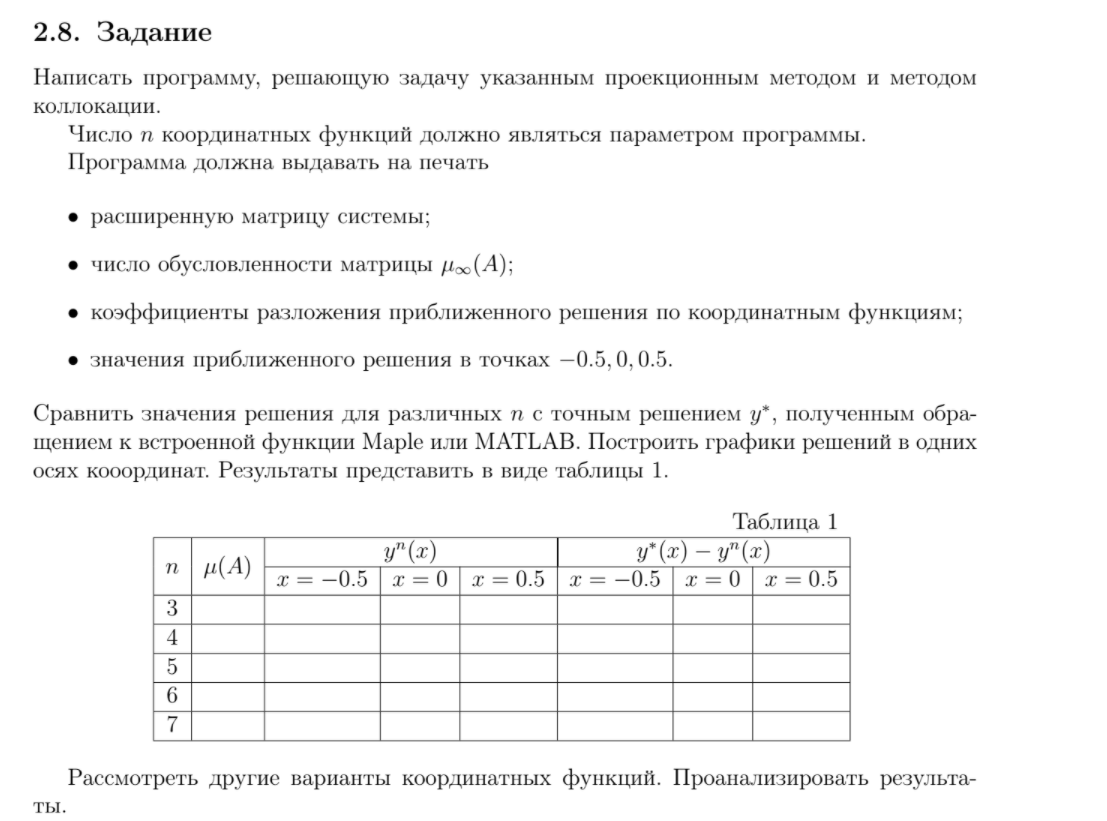

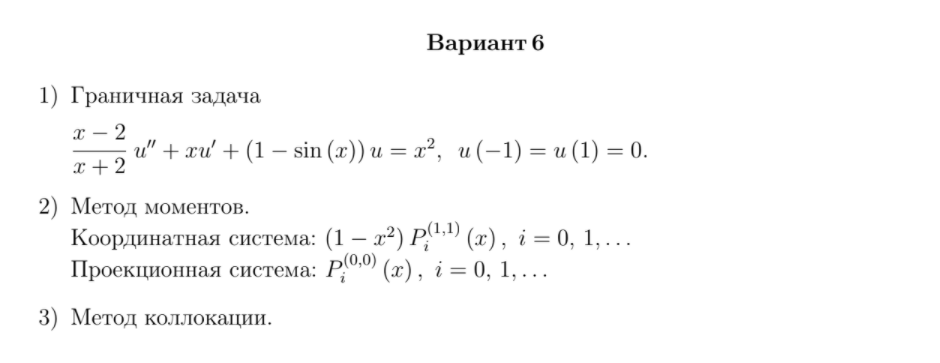

$Lu = \dfrac{x-2}{x + 2} u'' + x u' + (1 - \sin(x))u = x^2$

$p(x) = \dfrac{x-2}{x+2}$

$q(x) = x$

$r(x) = (1 - \sin(x))$

$f(x) = x^2$

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import jacobi
from math import *

In [ ]:
p = lambda x: (x - 2.0) / (x + 2.0)
q = lambda x: x
r = lambda x: (1.0 - sin(x))
f = lambda x: x**2 

### Зададим число ненулевых координатных функций

In [ ]:
n = 10

### Опишем координатную и проекционную системы
### Полиномы Якоби берем из scipy.special 

In [ ]:
def omega(x, i):
  return (1.0 - x**2) * jacobi(n=i, alpha=1, beta=1)(x)

In [ ]:
def omega_i(i):
  return lambda x: omega(x, i)

In [ ]:
def d_omega(x, i):
  return -2.0 *(i + 1) * jacobi(n=i+1, alpha=0, beta=0)(x)

In [ ]:
def d2_omega(x, i):
  return -2 * (i + 1) * (i + 2.0) / 2.0 * jacobi(n=i, alpha=1, beta=1)(x)

In [ ]:
def d2_omega_i(i):
  return lambda x: d2_omega(x, i)

In [ ]:
def d_omega_i(i):
  return lambda x: d_omega(x, i)

In [ ]:
def psi(x, i):
  return jacobi(n=i, alpha=0, beta=0)(x)

In [ ]:
def psi_i(i):
  return lambda x: psi(x, i)

In [ ]:
def d_psi(x, i):
  if i == 0:
    return 0
  return (i + 1) / 2.0 * jacobi(n=i-1, alpha=1, beta=1)(x) 


In [ ]:
def d_psi_i(i):
  return lambda x: d_psi(x, i)

In [ ]:
def d(f):
  if f is omega:
    return d_omega
  elif f is psi:
    return d_psi
  elif f is omega_i:
    return d_omega_i
  elif f is psi_i:
    return d_psi_i
  else:
    raise Exception

Интегрировать будем по формуле Симпсона

In [ ]:
def integrate(a, b, func, m=20):
    h = (b - a) / m
    alpha = a + h / 2
    beta = a + h
    return h / 6 * (func(a) + 4 * sum( func(alpha + k * h) for k in range(m)) +
                    func(b) + 2 * sum( func(beta + k * h) for k in range(m - 1)))

In [ ]:
def dot(y, z):
  return integrate(-1, 1, lambda x: y(x) * z(x), 2 * n)

### Решение методом моментов 

In [ ]:
def bilinear_form(y, i, z, j):
  def under_intergal(x):
    return q(x) * d(y)(i)(x) * z(j)(x) + r(x) * y(i)(x) * z(j)(x) - p(x) * d(y)(i)(x) * d(z)(j)(x) - 4 / ((x+2)**2) * d(y)(i)(x) * z(j)(x)
    # return p(x) * d(y)(i)(x) * d(z)(j)(x)
  return integrate(-1, 1, under_intergal, 2 * n) + p(1) * d(y)(i)(1) * z(j)(1) - p(-1) * d(y)(i)(-1) * z(j)(-1)


In [ ]:
A = np.zeros((n, n))
for i in range(n):
  for j in range(n):
    A[i, j] = bilinear_form(omega_i, i, psi_i, j) 

In [ ]:
b = np.zeros((n, 1))
for i in range(n):
  b[i] = dot(f, psi_i(i))

In [ ]:
def condition_number(mat):
  return np.linalg.norm(mat) * np.linalg.norm(np.linalg.inv(A))

Матрица системы

In [ ]:
pd.DataFrame(A)

,0,1,2,3,4,5,6,7,8,9
0,4.788887,-1.825913,-0.461130,0.034391,0.017914,-0.006490,-0.003937,0.011138,-0.028714,0.054685
1,-9.963006,10.400107,-4.130950,0.020018,-0.124949,0.047294,-0.001162,-0.036501,0.075049,-0.174519
2,19.450578,-15.105229,16.292530,-6.693946,0.627689,-0.288185,0.049375,0.060934,-0.196860,0.335234
3,-21.098977,26.230139,-20.272067,22.197870,-9.289021,1.243398,-0.395225,-0.081652,0.329596,-0.776159
4,33.251601,-26.496999,32.886921,-25.402169,28.077900,-11.840950,1.738495,-0.290278,-0.645131,1.186561
5,-31.967618,39.933874,-31.822822,39.478728,-30.463544,33.823338,-14.186394,1.802514,0.413622,-2.337034
6,46.642307,-37.293250,46.561111,-37.073192,45.920367,-35.307534,39.131132,-15.935041,0.733685,2.515916
7,-42.637260,53.270770,-42.553219,53.048099,-42.108443,51.921834,-39.553632,43.307007,-16.289122,-2.797871
8,59.931577,-47.905209,59.770433,-47.611488,59.112391,-46.558811,56.804505,-42.416888,45.035092,-13.899305
9,-53.231684,66.453347,-52.989103,65.872713,-52.111333,64.094069,-49.657408,59.277158,-42.568411,42.284504


Столбец свободных членов

In [ ]:
pd.DataFrame(b)

,0
0,6.666667e-01
1,1.184238e-16
2,2.666692e-01
3,1.646831e-16
4,3.014323e-05
5,1.857311e-16
6,1.820409e-04
7,1.942890e-16
8,7.397015e-04
9,1.535809e-16


Число обусловленности

In [ ]:
condition_number(A)

166.73245993623723

In [ ]:
c = np.linalg.solve(A.T, b)

Коэффициенты обобщенного ряда Фурье

In [ ]:
pd.DataFrame(c)

,0
0,0.105595
1,0.047179
2,0.041799
3,0.015794
4,0.005694
5,0.002103
6,0.000640
7,0.000401
8,0.000338
9,0.000073


Искомое решение:

In [ ]:
def y_n(x):
  return sum([float(c[i]) * omega(x, i) for i in range(n)])

Значение приближенного решения в точках $-0.5, 0, 0.5$

In [ ]:
y_n(-0.5), y_n(0), y_n(0.5)

(0.05429421889233785, 0.07762138809552083, 0.11006316055293476)

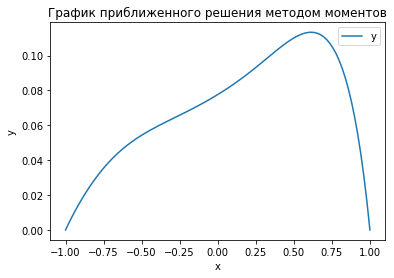

In [ ]:
x = np.linspace(-1, 1, 100)
y = list(map(y_n, x))
plt.plot(x, y, label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('График приближенного решения методом моментов')
plt.show()

# Метод коллокации

In [ ]:
cheb_roots = [cos((2 * k - 1) / 2 / n * pi) for k in range(1, n + 1)]

In [ ]:
cheb_roots

[0.9876883405951378,
 0.8910065241883679,
 0.7071067811865476,
 0.4539904997395468,
 0.15643446504023092,
 -0.15643446504023104,
 -0.4539904997395467,
 -0.7071067811865475,
 -0.8910065241883678,
 -0.9876883405951377]

In [ ]:
A1 = np.zeros((n, n))
for i in range(n):
  for j in range(n):
    A1[i, j] = p(cheb_roots[i]) * d2_omega_i(j)(cheb_roots[i]) + q(cheb_roots[i]) * d_omega_i(j)(cheb_roots[i]) + r(cheb_roots[i]) * omega_i(j)(cheb_roots[i])

b1 = np.zeros((n,1))
for i in range(n):
  b1[i] = f(cheb_roots[i])

c1 = np.linalg.solve(A1, b1)

Матрица системы

In [ ]:
pd.DataFrame(A1)

,0,1,2,3,4,5,6,7,8,9
0,-1.269357,0.218132,6.341356,18.685850,38.439243,66.304085,102.432039,146.382576,197.108425,252.969001
1,-0.774766,1.720972,8.044895,16.478203,23.396949,24.467518,16.311130,-1.903846,-27.507880,-54.428202
2,0.130366,3.593142,7.394575,5.737120,-4.142007,-17.519241,-23.708962,-13.685491,11.348966,37.500209
3,1.293508,4.183426,1.401114,-8.452834,-12.848448,0.204223,20.932957,22.380449,-6.280056,-37.535572
4,2.484428,2.152417,-7.083588,-8.288245,10.676648,18.775170,-9.987622,-32.076742,2.570866,45.274682
5,3.417987,-2.838456,-9.770162,11.208724,14.758374,-25.575891,-13.883808,43.829729,3.786629,-61.968906
6,3.904456,-10.030987,1.680161,22.481000,-31.112173,-3.249101,53.915239,-54.339202,-19.139353,95.443478
7,4.012491,-18.226153,29.944711,-17.395373,-27.174957,81.122155,-99.734398,48.593570,62.074234,-169.957897
8,3.992361,-26.063662,68.176208,-118.524321,154.128743,-148.567745,82.524462,46.340576,-217.802987,390.357151
9,3.996548,-31.263158,97.634072,-216.428727,397.556235,-646.769743,965.104761,-1348.528639,1787.820472,-2268.691903


Столбец свободных членов

In [ ]:
pd.DataFrame(b1)

,0
0,0.975528
1,0.793893
2,0.500000
3,0.206107
4,0.024472
5,0.024472
6,0.206107
7,0.500000
8,0.793893
9,0.975528


Число обусловленности

In [ ]:
condition_number(A1)

1840.6717468244663

Коэффициенты обобщенного ряда Фурье

In [ ]:
pd.DataFrame(c1)

,0
0,0.105601
1,0.047191
2,0.041827
3,0.015845
4,0.005797
5,0.002238
6,0.000812
7,0.000310
8,0.000139
9,0.000043


In [ ]:
def y_n_1(x):
  return sum([float(c1[i]) * omega(x, i) for i in range(n)])

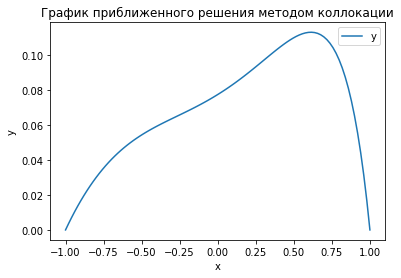

In [ ]:
x = np.linspace(-1, 1, 100)
y = list(map(y_n_1, x))
plt.plot(x, y, label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('График приближенного решения методом коллокации')
plt.show()

# Решение при помощи библиотеки SciPy

In [ ]:
from scipy.integrate import solve_bvp

Запишем уравнение как систему:

$u' = v$

$v' = \left((\sin(x) - 1)u - xv + x^2\right) \dfrac{x+2}{x-2}$

In [ ]:
def eq(x, y):
  u, v = y
  return np.vstack((v, ((np.sin(x) - 1)*u - x*v + x**2) * (x+2)/(x-2)))
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [ ]:
x = np.linspace(-1, 1, 101)
y0 = np.zeros((2, x.size))
res = solve_bvp(eq, bc, x, y0)

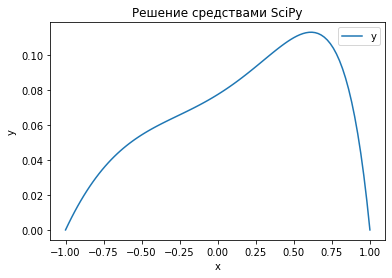

In [ ]:
y_plot = res.sol(x)[0]
plt.plot(x, y_plot, label='y')
plt.legend()
plt.title("Решение средствами SciPy")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

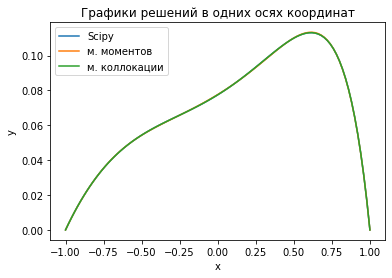

In [ ]:
y_plot = res.sol(x)[0]
plt.plot(x, y_plot, label='Scipy')
plt.plot(x, list(map(y_n, x)), label='м. моментов')
plt.plot(x, list(map(y_n_1, x)), label='м. коллокации')
plt.legend()
plt.title("Графики решений в одних осях координат")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
def solve_momentum(n):
  A = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      A[i, j] = bilinear_form(omega_i, i, psi_i, j) 
      
  b = np.zeros((n, 1))
  for i in range(n):
    b[i] = dot(f, psi_i(i))

  c = np.linalg.solve(A.T, b)

  def y_n(x):
    return sum([float(c[i]) * omega(x, i) for i in range(n)])
  
  return condition_number(A), y_n(-0.5), y_n(0), y_n(0.5) 


In [ ]:
def solve_collocation(n):
  cheb_roots = [cos((2 * k - 1) / 2 / n * pi) for k in range(1, n + 1)]
  A1 = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      A1[i, j] = p(cheb_roots[i]) * d2_omega_i(j)(cheb_roots[i]) + q(cheb_roots[i]) * d_omega_i(j)(cheb_roots[i]) + r(cheb_roots[i]) * omega_i(j)(cheb_roots[i])

  b1 = np.zeros((n,1))
  for i in range(n):
    b1[i] = f(cheb_roots[i])

  c1 = np.linalg.solve(A1, b1)

  def y_n_1(x):
    return sum([float(c[i]) * omega(x, i) for i in range(n)])
  
  return condition_number(A1), y_n_1(-0.5), y_n_1(0), y_n_1(0.5) 


In [ ]:
t_v = [res.sol(-0.5)[0], res.sol(0)[0], res.sol(0.5)[0]]
columns = ['n', 'mu(A)', 'y_n(-0.5)', 'y_n(0)', 'y_n(0.5)', 'delta(-0.5)', 'delta(0)', 'delta(0.5)']
df_mm = pd.DataFrame(columns=columns)
for n in range(3, 11):
  t = solve_momentum(n)
  row = {'n': n, 'mu(A)': t[0], 'y_n(-0.5)': t[1], 'y_n(0)': t[2],
         'y_n(0.5)': t[3], 'delta(-0.5)': t[1] - t_v[0],
         'delta(0)': t[2] - t_v[1], 'delta(0.5)': t[3] - t_v[2]}
  df_mm = df_mm.append(row, ignore_index=True)

df_cl = pd.DataFrame(columns=columns)
for n in range(3, 11):
  t = solve_collocation(n)
  row = {'n': n, 'mu(A)': t[0], 'y_n(-0.5)': t[1], 'y_n(0)': t[2],
         'y_n(0.5)': t[3], 'delta(-0.5)': t[1] - t_v[0],
         'delta(0)': t[2] - t_v[1], 'delta(0.5)': t[3] - t_v[2]}
  df_cl = df_cl.append(row, ignore_index=True)
  

# Обзор работы метода моментов

In [ ]:
df_mm

,n,mu(A),y_n(-0.5),y_n(0),y_n(0.5),delta(-0.5),delta(0),delta(0.5)
0,3.0,17.576478,0.050577,0.115661,0.183877,-0.003772,0.038204,0.073896
1,4.0,29.666731,0.054539,0.069144,0.125083,0.000190,-0.008313,0.015102
2,5.0,45.660229,0.055353,0.075572,0.108380,0.001004,-0.001885,-0.001600
3,6.0,63.983415,0.053782,0.078424,0.108069,-0.000567,0.000967,-0.001911
4,7.0,85.975854,0.054527,0.077411,0.109738,0.000178,-0.000046,-0.000242
5,8.0,110.057548,0.054463,0.077223,0.110153,0.000114,-0.000233,0.000172
6,9.0,137.514640,0.054210,0.077646,0.110188,-0.000139,0.000189,0.000208
7,10.0,166.732460,0.054294,0.077621,0.110063,-0.000055,0.000165,0.000083


# Обзор работы метода коллокации

In [ ]:
df_cl

,n,mu(A),y_n(-0.5),y_n(0),y_n(0.5),delta(-0.5),delta(0),delta(0.5)
0,3.0,35.794389,0.049690,0.074246,0.120459,-0.004659,-0.003211,0.010478
1,4.0,90.539049,0.057094,0.074246,0.113055,0.002745,-0.003211,0.003075
2,5.0,187.104989,0.053924,0.077805,0.109886,-0.000425,0.000348,-0.000095
3,6.0,339.771271,0.054183,0.077805,0.109627,-0.000166,0.000348,-0.000354
4,7.0,564.118646,0.054420,0.077455,0.109864,0.000071,-0.000002,-0.000117
5,8.0,876.933112,0.054235,0.077455,0.110049,-0.000114,-0.000002,0.000069
6,9.0,1296.126735,0.054271,0.077621,0.110086,-0.000078,0.000165,0.000106
7,10.0,1840.671747,0.054294,0.077621,0.110063,-0.000055,0.000165,0.000083
